In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from bs4 import BeautifulSoup
import spacy
#import unidecode
#from word2number import w2n
#import contractions
import en_core_web_sm
import datetime as dt
import regex as re
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
#from fastai.text.all import *
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import eli5
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [6]:
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
#Importing data
names = ["Review_ID","Rating","Year_Month","Reviewer_Location","Review_text","Location"]
#df_fl = pd.read_csv("/Users/parsat8/Desktop/Spring Quarter/NLP/Final Project/Dataset/drive-download-20210510T012249Z-001/Disney-HK.csv",
#                   names = names, skiprows = 1)
#df_ana = pd.read_csv("/Users/parsat8/Desktop/Spring Quarter/NLP/Final Project/Dataset/drive-download-20210510T012249Z-001/Disney-Anaheim.csv",
#                   names = names, skiprows = 1)
df_main = pd.read_csv("data\Disneyland-all.csv",
                   names = names, skiprows = 1)



In [17]:
df_fl.shape

(9620, 6)

In [18]:
df_ana.shape

(19406, 6)

In [19]:
df_pa.shape

(13630, 6)

In [20]:
# Stacking the data on top of each other and removing the duplicated rows
df_main = pd.concat([df_fl,df_pa,df_ana],axis = 0).drop_duplicates().reset_index(drop=True)

In [21]:
df_main.shape

(42644, 6)

In [22]:
df_main.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_text,Location
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides its a Small World is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well.,HongKong
1,670682799,4,2019-5,Philippines,"Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seem...",HongKong
2,670623270,4,2019-4,United Arab Emirates,"Thanks God it wasn t too hot or too humid when I was visiting the park otherwise it would be a big issue (there is not a lot of shade).I have arrived around 10:30am and left at 6pm. Unfortunately I didn t last until evening parade, but 8.5 hours was too much for me.There is plenty to do and everyone will find something interesting for themselves to enjoy.It wasn t extremely busy and the longest time I had to queue for certain attractions was 45 minutes (which is really not that bad).Although I had an amazing time, I felt a bit underwhelmed with choice of rides and attractions. The ...",HongKong
3,670607911,4,2019-4,Australia,"HK Disneyland is a great compact park. Unfortunately there is quite a bit of maintenance work going on at present so a number of areas are closed off (including the famous castle) If you go midweek, it is not too crowded and certainly no where near as bus as LA Disneyland. We did notice on this visit that prices for food, drinks etc have really gone through the roof so be prepared to pay top dollar for snacks (and avoid the souvenir shops if you can) Regardless, kids will love it.",HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1 hour from Kowlon, my kids like disneyland so much, everything is fine. but its really crowded and hot in Hong Kong",HongKong


In [23]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42644 entries, 0 to 42643
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42644 non-null  int64 
 1   Rating             42644 non-null  int64 
 2   Year_Month         42644 non-null  object
 3   Reviewer_Location  42644 non-null  object
 4   Review_text        42644 non-null  object
 5   Location           42644 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [11]:
# labeling the data by utilizing the Rating column
rating = df_main["Rating"]
def label_func(rating):
    if rating >=4:
        return "Positive"
    elif rating == 3:
            return "Neutral"
    else:
        return "Negative"
        
df_main["Sentiment"] = df_main["Rating"].apply(lambda x: label_func(x))   

In [12]:
df_main.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_text,Location,Sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,Positive
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,Positive
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,Positive
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,Positive
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,Positive


# Text Preprocessing

In [51]:
#nlp = spacy.load('en_core_web_sm')

In [52]:
def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator="")
    return stripped_text

In [53]:
def remov_stopwords(text):
    stopwords = set(STOPWORDS)
    text = text.replace(str(stopwords),"")
    return text

In [54]:
def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())

In [55]:
def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text

In [56]:
def expand_contractions(text):
    """expand shortened words, e.g. don't to do not"""
    text = contractions.fix(text)
    return text

In [57]:
lemmatizer = WordNetLemmatizer()
def lem (text):
    text = lemmatizer.lemmatize(text)
    return text

In [58]:
pattern = r'[0-9]'
def remove_num(text):
    text = re.sub(pattern, '', text)
    return text

In [59]:
def text_preprocessing(text):
    """preprocess text with default option set to true for all steps"""
    text = remove_num(text)

    text = strip_html_tags(text)
    
    text = remove_whitespace(text)
    
    text = remove_accented_chars(text)
    
    text = expand_contractions(text)
    
    text = lem(text)
    
    text = remov_stopwords(text)

    text = text.lower()
  
    return text

In [60]:
# subsetting the main dataframe to get only review text and sentiment columns
df_main_class = df_main[["Review_text","Sentiment"]]

In [61]:
# Before the text processing
df_main_class

,Review_text,Sentiment
0,If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides its a Small World is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well.,Positive
1,"Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seem...",Positive
2,"Thanks God it wasn t too hot or too humid when I was visiting the park otherwise it would be a big issue (there is not a lot of shade).I have arrived around 10:30am and left at 6pm. Unfortunately I didn t last until evening parade, but 8.5 hours was too much for me.There is plenty to do and everyone will find something interesting for themselves to enjoy.It wasn t extremely busy and the longest time I had to queue for certain attractions was 45 minutes (which is really not that bad).Although I had an amazing time, I felt a bit underwhelmed with choice of rides and attractions. The ...",Positive
3,"HK Disneyland is a great compact park. Unfortunately there is quite a bit of maintenance work going on at present so a number of areas are closed off (including the famous castle) If you go midweek, it is not too crowded and certainly no where near as bus as LA Disneyland. We did notice on this visit that prices for food, drinks etc have really gone through the roof so be prepared to pay top dollar for snacks (and avoid the souvenir shops if you can) Regardless, kids will love it.",Positive
4,"the location is not in the city, took around 1 hour from Kowlon, my kids like disneyland so much, everything is fine. but its really crowded and hot in Hong Kong",Positive
...,...,...
42639,"I have taken my music groups to Disneyland for a number of years to participate in Disney Magic Music Days. From Start to finish it has been a totally professional experience! If you are thinking about this program, stop thinking, and do it!Lines and waiting in line is part of the experience. Take time to meet new people, and enjoy your experience without being in a big hurry. A little planning will help in cutting down the wait time. Avoid the busiest times Christmas, Spring Break, etc. Our last family trip was in mid July, and our longest wait in line was 15 min. at Small World, of all...",Positive
42640,"This is definitely the Happiest Place on Earth! No long drives to get to these parks! The rides are better, too! Also, get fastpasses! The lines can get really long.",Positive
42641,"never again...what a horrible experience, the worst weekend of my life. We went to Disneyland fully understanding that it would be crowded, there would be lines and lots & lots of people..however, there were so many people that you could literally not walk, You had to wait in line to move! Waits for rides were 3 1 2 4 hrs long, waits just to get a speed pass were over 1 hr long. Although we all remained in good spirits and tried to enjoy it, it was impossible. You couldn't even take a picture of each other, it was too crowded. After only 3 hours on our second day there, my nieces asked to ...",Negative
42642,"We take a long weekend trip to California each January and always start our vacation at Disneyland. Wonderful, fun, safe and makes you forget just for a little while that all is not perfect in the world.",Positive


In [62]:
#Apply the text processing to all of the rows in Review_text column
df_main_class["Review_text"]= df_main_class["Review_text"].apply(lambda x: text_preprocessing(x))

<ipython-input-62-6d8ad1592dc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_class["Review_text"]= df_main_class["Review_text"].apply(lambda x: text_preprocessing(x))


In [63]:
# After the text processing
df_main_class.head()

,Review_text,Sentiment
0,if you have ever been to disneyland anywhere you will find disneyland hong kong very similar in the layout when you walk into main street! it has a very familiar feel. one of the rides its a small world is absolutely fabulous and worth doing. the day we visited was fairly hot and relatively busy but the queues moved fairly well.,Positive
1,"its been a while since d last time we visit hk disneyland .. yet, this time we only stay in tomorrowland .. aka marvel land!now they have iron man experience n d newly open ant man n d wasp!!ironman .. great feature n so exciting, especially d whole scenery of hk (hk central area to kowloon)!antman .. changed by previous buzz lightyear! more or less d same, but i am expecting to have something most!!however, my boys like it!!space mountain .. turns into star wars!! this is great!!!for cast members (staffs) .. felt bit minus point from before!!! just dun feel like its a disney brand!! seems...",Positive
2,"thanks god it wasn t too hot or too humid when i was visiting the park otherwise it would be a big issue (there is not a lot of shade).i have arrived around :am and left at pm. unfortunately i didn t last until evening parade, but . hours was too much for me.there is plenty to do and everyone will find something interesting for themselves to enjoy.it wasn t extremely busy and the longest time i had to queue for certain attractions was minutes (which is really not that bad).although i had an amazing time, i felt a bit underwhelmed with choice of rides and attractions. the park itself is qui...",Positive
3,"hk disneyland is a great compact park. unfortunately there is quite a bit of maintenance work going on at present so a number of areas are closed off (including the famous castle) if you go midweek, it is not too crowded and certainly no where near as bus as la disneyland. we did notice on this visit that prices for food, drinks etc have really gone through the roof so be prepared to pay top dollar for snacks (and avoid the souvenir shops if you can) regardless, kids will love it.",Positive
4,"the location is not in the city, took around hour from kowlon, my kids like disneyland so much, everything is fine. but its really crowded and hot in hong kong",Positive


In [64]:
X = df_main_class["Review_text"]
Y = df_main_class["Sentiment"]

In [131]:
# Splitting the data into train and test data
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.2)
X_train

12263                                                    the disneyland park is as magical and excitimg as it promises to be. everything so well planned out and the attention to detail is amazing. we spent a whole day walking between the parks. due to the queues, could not go on many rides but we managed to catch the princesses show and the royal parade in the evening. the highlight was the fireworks display held at the end of the day at closing time. please do not miss this as it is one of the best i have ever seen! i felt like a kid all over again :) the experience justifies the price of the ticket.
37869                                                                                                                                                                                                                                                                                     disneyland park has never lost its magic for me! i have been coming here for many years. it is all about the 

In [66]:
# Bag of words
vectorizer = CountVectorizer()

In [67]:
# Defining a classification function which gets a vectorizer and a model as an input
def classification(vectorizer, model, fit_vect =True):
    if fit_vect:
        vectorizer.fit(X_train)
    train_vec = vectorizer.transform(X_train)
    test.vec = vectorizer.transform(X_test)
    model.fit(train_vec, Y_train)
    train_preds = model.predict(train_vec)
    train_f1 = f1_score(Y_train, train_preds, average='micro')
    test_preds = model.predict(test.vec)
    test_f1 = f1_score(Y_test, test_preds, average='micro')
    return train_f1, test_f1  
    
    
    

In [68]:
# initiating the Naive Bayes Model
NB = MultinomialNB()

In [69]:
classification(vectorizer,NB,fit_vect = True)

(0.8769456250916019, 0.8330402157345527)

0.1 => (0.8769456250916019, 0.8330402157345527)
0.15000000000000002 => (0.8769456250916019, 0.8330402157345527)
0.20000000000000004 => (0.8769456250916019, 0.8330402157345527)
0.25000000000000006 => (0.8769456250916019, 0.8330402157345527)
0.30000000000000004 => (0.8769456250916019, 0.8330402157345527)
0.3500000000000001 => (0.8769456250916019, 0.8330402157345527)
0.40000000000000013 => (0.8769456250916019, 0.8330402157345527)
0.45000000000000007 => (0.8769456250916019, 0.8330402157345527)
0.5000000000000001 => (0.8769456250916019, 0.8330402157345527)
0.5500000000000002 => (0.8769456250916019, 0.8330402157345527)
0.6000000000000002 => (0.8769456250916019, 0.8330402157345527)
0.6500000000000001 => (0.8769456250916019, 0.8330402157345527)
0.7000000000000002 => (0.8769456250916019, 0.8330402157345527)
0.7500000000000002 => (0.8769456250916019, 0.8330402157345527)
0.8000000000000002 => (0.8769456250916019, 0.8330402157345527)
0.8500000000000002 => (0.8769456250916019, 0.8330402157345527)
0

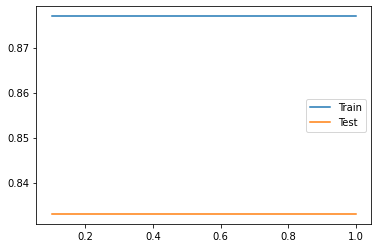

In [70]:
arange = np.arange(0.1, 1.01, 0.05)
results = []
for a in arange:
  model = MultinomialNB(alpha=a)
  res = classification(vectorizer,NB)
  results.append(res)
  print(a, '=>', res)
  
plt.plot(arange, results)
plt.legend(["Train", "Test"])
plt.show()

unigram => (0.7963359226146857, 0.7920037519052643)
bigram => (0.7960721090429429, 0.7917692578262399)
trigram => (0.7960721090429429, 0.7917692578262399)
combined => (0.7960721090429429, 0.7917692578262399)


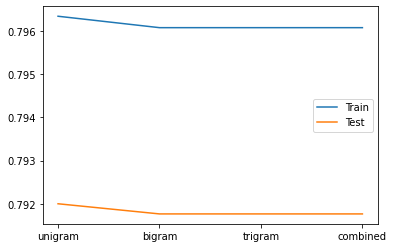

In [71]:
# different ngrams with a fixed alpha for Naive Bayes
tfidf_bigram = TfidfVectorizer(ngram_range=(2,2))
tfidf_trigram = TfidfVectorizer(ngram_range=(3,3))
tfidf_combined = TfidfVectorizer(ngram_range=(1,3))
tfidf = TfidfVectorizer()
tfidf_vectorizers = [tfidf, tfidf_bigram, tfidf_trigram, tfidf_combined]
vectorizer_names = ['unigram', 'bigram', 'trigram', 'combined']
xs = list(range(len(tfidf_vectorizers)))
results = []
for i in range(len(tfidf_vectorizers)):
  model = MultinomialNB(alpha=1.0)
  res = classification(tfidf_vectorizers[i], model)
  results.append(res)
  print(vectorizer_names[i], '=>', res)
  
plt.plot(xs, results)
plt.xticks(xs, vectorizer_names)
plt.legend(["Train", "Test"])
plt.show()

In [72]:
lr = LogisticRegression(max_iter =300, solver = "liblinear")

In [73]:
# Logisitc Reg with Count Vectorizer as the vecotrizer
classification(vectorizer,lr,fit_vect = True)

(0.95139967756119, 0.8362058858013837)

In [74]:
tfidf = TfidfVectorizer()
tfidf_bigram = TfidfVectorizer(ngram_range=(2,2))
tfidf_trigram = TfidfVectorizer(ngram_range=(3,3))
tfidf_combined = TfidfVectorizer(ngram_range=(1,3))
tfidf_vectorizers = [tfidf, tfidf_bigram, tfidf_trigram, tfidf_combined]

In [75]:
# Logisitc Reg with tfidf vectorizer the vecotrizer
classification(tfidf,lr,fit_vect = True)

(0.870408911036201, 0.8438269433696799)

unigram => (0.870408911036201, 0.8438269433696799)
bigram => (0.8550197860178806, 0.821081017704303)
trigram => (0.798915433093947, 0.7937624574979482)
combined => (0.8626996922174996, 0.8328057216555282)


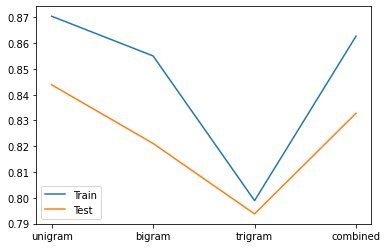

In [76]:
# different ngrams with a fixed solver for logistic regression
vectorizer_names = ['unigram', 'bigram', 'trigram', 'combined']
xs = list(range(len(vectorizer_names)))
results = []
for i in range(len(tfidf_vectorizers)):
  model = LogisticRegression(solver = "liblinear")
  res = classification(tfidf_vectorizers[i], model)
  results.append(res)
  print(vectorizer_names[i], '=>', res)
  
plt.plot(xs, results)
plt.xticks(xs, vectorizer_names)
plt.legend(["Train", "Test"])
plt.show()

In [77]:
# Random Forest
rf = RandomForestClassifier()

In [78]:
# rf with count vectorizer 
classification(vectorizer,rf,fit_vect = True)

(0.9999706873809174, 0.7934107163794114)

In [79]:
# rf with tfidf vectorizer 
classification(tfidf,rf,fit_vect = True)

(0.9999706873809174, 0.7925899871028256)

unigram => (1.0, 0.7927072341423379)
bigram => (0.999941374761835, 0.7921209989447765)
trigram => (1.0, 0.793645210458436)
combined => (0.9999706873809174, 0.7920037519052643)


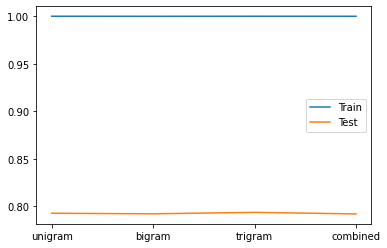

In [81]:
# different ngrams with a fixed solver for logistic regression
vectorizer_names = ['unigram', 'bigram', 'trigram', 'combined']
xs = list(range(len(vectorizer_names)))
results = []
for i in range(len(tfidf_vectorizers)):
  model = RandomForestClassifier()
  res = classification(tfidf_vectorizers[i], model)
  results.append(res)
  print(vectorizer_names[i], '=>', res)
  
plt.plot(xs, results)
plt.xticks(xs, vectorizer_names)
plt.legend(["Train", "Test"])
plt.show()

In [82]:
## Another approach to label the data other than using the rating --> we are gonna use Vader
df_main_class.head(3)

,Review_text,Sentiment
0,if you have ever been to disneyland anywhere you will find disneyland hong kong very similar in the layout when you walk into main street! it has a very familiar feel. one of the rides its a small world is absolutely fabulous and worth doing. the day we visited was fairly hot and relatively busy but the queues moved fairly well.,Positive
1,"its been a while since d last time we visit hk disneyland .. yet, this time we only stay in tomorrowland .. aka marvel land!now they have iron man experience n d newly open ant man n d wasp!!ironman .. great feature n so exciting, especially d whole scenery of hk (hk central area to kowloon)!antman .. changed by previous buzz lightyear! more or less d same, but i am expecting to have something most!!however, my boys like it!!space mountain .. turns into star wars!! this is great!!!for cast members (staffs) .. felt bit minus point from before!!! just dun feel like its a disney brand!! seems...",Positive
2,"thanks god it wasn t too hot or too humid when i was visiting the park otherwise it would be a big issue (there is not a lot of shade).i have arrived around :am and left at pm. unfortunately i didn t last until evening parade, but . hours was too much for me.there is plenty to do and everyone will find something interesting for themselves to enjoy.it wasn t extremely busy and the longest time i had to queue for certain attractions was minutes (which is really not that bad).although i had an amazing time, i felt a bit underwhelmed with choice of rides and attractions. the park itself is qui...",Positive


#### Polarity and Subjectivity

In [83]:
def detect_tb_polarity(text):
    return TextBlob(text).sentiment.polarity
def detect_tb_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def detect_vader_neg(text):
    return vader.polarity_scores(text)['neg']


def detect_vader_pos(text):
    return vader.polarity_scores(text)['pos']

def detect_vader_comp(text):
    return vader.polarity_scores(text)['compound']

In [84]:
df_sample = df_main_class.copy()
df_sample.head()

,Review_text,Sentiment
0,if you have ever been to disneyland anywhere you will find disneyland hong kong very similar in the layout when you walk into main street! it has a very familiar feel. one of the rides its a small world is absolutely fabulous and worth doing. the day we visited was fairly hot and relatively busy but the queues moved fairly well.,Positive
1,"its been a while since d last time we visit hk disneyland .. yet, this time we only stay in tomorrowland .. aka marvel land!now they have iron man experience n d newly open ant man n d wasp!!ironman .. great feature n so exciting, especially d whole scenery of hk (hk central area to kowloon)!antman .. changed by previous buzz lightyear! more or less d same, but i am expecting to have something most!!however, my boys like it!!space mountain .. turns into star wars!! this is great!!!for cast members (staffs) .. felt bit minus point from before!!! just dun feel like its a disney brand!! seems...",Positive
2,"thanks god it wasn t too hot or too humid when i was visiting the park otherwise it would be a big issue (there is not a lot of shade).i have arrived around :am and left at pm. unfortunately i didn t last until evening parade, but . hours was too much for me.there is plenty to do and everyone will find something interesting for themselves to enjoy.it wasn t extremely busy and the longest time i had to queue for certain attractions was minutes (which is really not that bad).although i had an amazing time, i felt a bit underwhelmed with choice of rides and attractions. the park itself is qui...",Positive
3,"hk disneyland is a great compact park. unfortunately there is quite a bit of maintenance work going on at present so a number of areas are closed off (including the famous castle) if you go midweek, it is not too crowded and certainly no where near as bus as la disneyland. we did notice on this visit that prices for food, drinks etc have really gone through the roof so be prepared to pay top dollar for snacks (and avoid the souvenir shops if you can) regardless, kids will love it.",Positive
4,"the location is not in the city, took around hour from kowlon, my kids like disneyland so much, everything is fine. but its really crowded and hot in hong kong",Positive


In [85]:
df_sample['tb_polarity'] = df_sample.Review_text.apply(detect_tb_polarity)
df_sample['tb_subjectivity'] = df_sample.Review_text.apply(detect_tb_subjectivity)

In [86]:
vader = SentimentIntensityAnalyzer()
df_sample['vader_pos'] = df_sample.Review_text.apply(detect_vader_pos)
df_sample['vader_neg'] = df_sample.Review_text.apply(detect_vader_neg)
df_sample['vader_comp'] = df_sample.Review_text.apply(detect_vader_comp)


In [87]:
# Checking the dataframe
df_sample.head(2)
#print(len(df_sample))

,Review_text,Sentiment,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp
0,if you have ever been to disneyland anywhere you will find disneyland hong kong very similar in the layout when you walk into main street! it has a very familiar feel. one of the rides its a small world is absolutely fabulous and worth doing. the day we visited was fairly hot and relatively busy but the queues moved fairly well.,Positive,0.243981,0.561481,0.106,0.000,0.7069
1,"its been a while since d last time we visit hk disneyland .. yet, this time we only stay in tomorrowland .. aka marvel land!now they have iron man experience n d newly open ant man n d wasp!!ironman .. great feature n so exciting, especially d whole scenery of hk (hk central area to kowloon)!antman .. changed by previous buzz lightyear! more or less d same, but i am expecting to have something most!!however, my boys like it!!space mountain .. turns into star wars!! this is great!!!for cast members (staffs) .. felt bit minus point from before!!! just dun feel like its a disney brand!! seems...",Positive,0.220342,0.434649,0.201,0.039,0.9871


In [98]:
positive_rows = df_sample.loc[(df_sample["Sentiment"] == "Positive")& (df_sample["vader_comp"] > 0.05),:]

In [99]:
 df_sample.loc[(df_sample["Sentiment"] == "Positive"),:]

,Review_text,Sentiment,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp
0,if you have ever been to disneyland anywhere you will find disneyland hong kong very similar in the layout when you walk into main street! it has a very familiar feel. one of the rides its a small world is absolutely fabulous and worth doing. the day we visited was fairly hot and relatively busy but the queues moved fairly well.,Positive,0.243981,0.561481,0.106,0.000,0.7069
1,"its been a while since d last time we visit hk disneyland .. yet, this time we only stay in tomorrowland .. aka marvel land!now they have iron man experience n d newly open ant man n d wasp!!ironman .. great feature n so exciting, especially d whole scenery of hk (hk central area to kowloon)!antman .. changed by previous buzz lightyear! more or less d same, but i am expecting to have something most!!however, my boys like it!!space mountain .. turns into star wars!! this is great!!!for cast members (staffs) .. felt bit minus point from before!!! just dun feel like its a disney brand!! seems...",Positive,0.220342,0.434649,0.201,0.039,0.9871
2,"thanks god it wasn t too hot or too humid when i was visiting the park otherwise it would be a big issue (there is not a lot of shade).i have arrived around :am and left at pm. unfortunately i didn t last until evening parade, but . hours was too much for me.there is plenty to do and everyone will find something interesting for themselves to enjoy.it wasn t extremely busy and the longest time i had to queue for certain attractions was minutes (which is really not that bad).although i had an amazing time, i felt a bit underwhelmed with choice of rides and attractions. the park itself is qui...",Positive,0.160498,0.422944,0.221,0.022,0.9920
3,"hk disneyland is a great compact park. unfortunately there is quite a bit of maintenance work going on at present so a number of areas are closed off (including the famous castle) if you go midweek, it is not too crowded and certainly no where near as bus as la disneyland. we did notice on this visit that prices for food, drinks etc have really gone through the roof so be prepared to pay top dollar for snacks (and avoid the souvenir shops if you can) regardless, kids will love it.",Positive,0.189286,0.512143,0.154,0.078,0.8425
4,"the location is not in the city, took around hour from kowlon, my kids like disneyland so much, everything is fine. but its really crowded and hot in hong kong",Positive,0.266667,0.437500,0.101,0.000,0.2846
...,...,...,...,...,...,...,...
42638,"we were at disneyland september th. what a great time we had!! the park was not crowded and the weather was awesome. this was our first family vacation and it could not of been better. it was hard to say who had a better time, our year old or us?? we will definately go back.!",Positive,0.382292,0.478125,0.187,0.058,0.8893
42639,"i have taken my music groups to disneyland for a number of years to participate in disney magic music days. from start to finish it has been a totally professional experience! if you are thinking about this program, stop thinking, and do it!lines and waiting in line is part of the experience. take time to meet new people, and enjoy your experience without being in a big hurry. a little planning will help in cutting down the wait time. avoid the busiest times christmas, spring break, etc. our last family trip was in mid july, and our longest wait in line was min. at small world, of all plac...",Positive,0.064457,0.382172,0.081,0.025,0.9273
42640,"this is definitely the happiest place on earth! no long drives to get to these parks! the rides are better, too! also, get fastpasses! the lines can get really long.",Positive,0.190625,0.450000,0.280,0.056,0.8679
42642,"we take a long weekend trip to california each january and always start our vacation at disneyland. wonderful, fun, safe and makes you forget just for a little while that all is not perfect in the world.",Positive,0.177083,0.600000,0.212,0.105,0.718

In [100]:
len(positive_rows)

32107

In [101]:
negative_rows = df_sample.loc[(df_sample["Sentiment"] == "Negative")&(df_sample["vader_comp"] < -0.05),:]

In [102]:
len(negative_rows)

1651

In [103]:
neutral_rows = df_sample.loc[
             (df_sample["vader_comp"] == 0.05),:]

In [104]:
df_main_class.shape

(42644, 2)

In [105]:
# Subseting the data frame by using the rows which rating wise and vader compound score wise were positive and negative or the 
# Rating was neutral
neg_pos_class_df = df_sample.loc[(df_sample["Sentiment"] == "Negative")&
             (df_sample["vader_comp"] < 0.05)  | (df_sample["Sentiment"] == "Positive")&
             (df_sample["vader_comp"] > 0.05) | (df_sample["Sentiment"] == "Neutral"),:]

In [106]:
neg_pos_class_df.head()

,Review_text,Sentiment,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp
0,if you have ever been to disneyland anywhere you will find disneyland hong kong very similar in the layout when you walk into main street! it has a very familiar feel. one of the rides its a small world is absolutely fabulous and worth doing. the day we visited was fairly hot and relatively busy but the queues moved fairly well.,Positive,0.243981,0.561481,0.106,0.000,0.7069
1,"its been a while since d last time we visit hk disneyland .. yet, this time we only stay in tomorrowland .. aka marvel land!now they have iron man experience n d newly open ant man n d wasp!!ironman .. great feature n so exciting, especially d whole scenery of hk (hk central area to kowloon)!antman .. changed by previous buzz lightyear! more or less d same, but i am expecting to have something most!!however, my boys like it!!space mountain .. turns into star wars!! this is great!!!for cast members (staffs) .. felt bit minus point from before!!! just dun feel like its a disney brand!! seems...",Positive,0.220342,0.434649,0.201,0.039,0.9871
2,"thanks god it wasn t too hot or too humid when i was visiting the park otherwise it would be a big issue (there is not a lot of shade).i have arrived around :am and left at pm. unfortunately i didn t last until evening parade, but . hours was too much for me.there is plenty to do and everyone will find something interesting for themselves to enjoy.it wasn t extremely busy and the longest time i had to queue for certain attractions was minutes (which is really not that bad).although i had an amazing time, i felt a bit underwhelmed with choice of rides and attractions. the park itself is qui...",Positive,0.160498,0.422944,0.221,0.022,0.9920
3,"hk disneyland is a great compact park. unfortunately there is quite a bit of maintenance work going on at present so a number of areas are closed off (including the famous castle) if you go midweek, it is not too crowded and certainly no where near as bus as la disneyland. we did notice on this visit that prices for food, drinks etc have really gone through the roof so be prepared to pay top dollar for snacks (and avoid the souvenir shops if you can) regardless, kids will love it.",Positive,0.189286,0.512143,0.154,0.078,0.8425
4,"the location is not in the city, took around hour from kowlon, my kids like disneyland so much, everything is fine. but its really crowded and hot in hong kong",Positive,0.266667,0.437500,0.101,0.000,0.2846


In [107]:
### By looking at the number of positive and negative reviews only based on the rating that we manually defined and
# compare them with the intersection of the positive and negative numbers from vader compound 

In [108]:
df_main["Location"].value_counts()

California    19404
Paris         13629
HongKong       9611
Name: Location, dtype: int64

In [109]:
################################# Let's divide the dataset to parks and then create classifiers for each park

hongkong_df=df_main.loc[df_main["Location"]=="HongKong",["Review_text","Sentiment"]]
califonia_df=df_main.loc[df_main["Location"]=="California",["Review_text","Sentiment"]]
paris_df=df_main.loc[df_main["Location"]=="Paris",["Review_text","Sentiment"]]

In [110]:
## shape
print(hongkong_df.shape)
print(califonia_df.shape)
print(paris_df.shape)

(9611, 2)
(19404, 2)
(13629, 2)


In [111]:
#Apply the text processing to all of the three parks datasets
hongkong_df["Review_text"]= hongkong_df["Review_text"].apply(lambda x: text_preprocessing(x))
califonia_df["Review_text"]= califonia_df["Review_text"].apply(lambda x: text_preprocessing(x))
paris_df["Review_text"]= paris_df["Review_text"].apply(lambda x: text_preprocessing(x))

In [112]:
## Let's create columns and sentiment using textblob 
hongkong_df['tb_polarity'] = hongkong_df.Review_text.apply(detect_tb_polarity)

califonia_df['tb_polarity'] = califonia_df.Review_text.apply(detect_tb_polarity)

paris_df['tb_polarity'] = paris_df.Review_text.apply(detect_tb_polarity)



In [113]:
## Let's create columns and sentiment using Vader
vader = SentimentIntensityAnalyzer()
hongkong_df['vader_comp'] = hongkong_df.Review_text.apply(detect_vader_comp)
califonia_df['vader_comp'] = califonia_df.Review_text.apply(detect_vader_comp)
paris_df['vader_comp'] = paris_df.Review_text.apply(detect_vader_comp)

In [114]:
# Let's get the rows that the sentiment from the rating , textblob and vader agrees on positive and negatives and for neutral we trust the rating
hongkong_df_main_class = hongkong_df.loc[(hongkong_df["Sentiment"] == "Negative")&
             (hongkong_df["vader_comp"] < 0.05) & (hongkong_df["tb_polarity"]<0)   | (hongkong_df["Sentiment"] == "Positive")&
             (hongkong_df["vader_comp"] > 0.05) & (hongkong_df["tb_polarity"]>0)  | (hongkong_df["Sentiment"] == "Neutral"),["Review_text","Sentiment"]]

califonia_df_main_class = califonia_df.loc[(califonia_df["Sentiment"] == "Negative")&
             (califonia_df["vader_comp"] < 0.05) & (califonia_df["tb_polarity"]<0)   | (califonia_df["Sentiment"] == "Positive")&
             (califonia_df["vader_comp"] > 0.05) & (califonia_df["tb_polarity"]>0)  | (califonia_df["Sentiment"] == "Neutral"),["Review_text","Sentiment"]]

paris_df_main_class = paris_df.loc[(paris_df["Sentiment"] == "Negative")&
             (paris_df["vader_comp"] < 0.05) & (paris_df["tb_polarity"]<0)   | (paris_df["Sentiment"] == "Positive")&
             (paris_df["vader_comp"] > 0.05) & (paris_df["tb_polarity"]>0)  | (paris_df["Sentiment"] == "Neutral"),["Review_text","Sentiment"]]





In [115]:
print(hongkong_df_main_class.shape)
print(califonia_df_main_class.shape)
print(paris_df_main_class.shape)

(8687, 2)
(17055, 2)
(11545, 2)


#### Classification

In [116]:
#Making classification models for each park dataset 
# Starting with HongKong
X_h = hongkong_df_main_class["Review_text"]
Y_h = hongkong_df_main_class["Sentiment"]

In [120]:
# Train Test
# Splitting the data into train and test data
X_train_h , X_test_h , Y_train_h , Y_test_h = train_test_split(X_h,Y_h, test_size = 0.2)


In [132]:
print(X_train_h.shape)
print(X_test_h.shape)
print(Y_train_h.shape)
print(Y_test_h.shape)

(6949,)
(1738,)
(6949,)
(1738,)


In [124]:
# Bag of words
vectorizer = CountVectorizer()
tfidf = TfidfVectorizer()
tfidf_bigram = TfidfVectorizer(ngram_range=(2,2))
tfidf_trigram = TfidfVectorizer(ngram_range=(3,3))
tfidf_combined = TfidfVectorizer(ngram_range=(1,3))
tfidf_vectorizers = [tfidf, tfidf_bigram, tfidf_trigram, tfidf_combined]

In [175]:
# Ensemble modeling
from sklearn.ensemble import VotingClassifier

features = CountVectorizer()
lr_features = CountVectorizer() 

lr_model = LogisticRegression(C=1, max_iter= 500)
lr_classifier = make_pipeline(features, lr_model)
lr_classifier.fit(X_train_h, Y_train_h)

#TODO FOR STUDENT: Try playing with the min_samples_split to see how it affect the ensemble score
rf_model = RandomForestClassifier(n_estimators = 200 , min_samples_split=0.1)
rf_classifier = make_pipeline(features, rf_model)
rf_classifier.fit(X_train_h, Y_train_h)

#Compare accuracy of the two models
lr_train_preds = lr_classifier.predict(X_train_h)
lr_train_f1 = f1_score(Y_train_h, lr_train_preds, average='micro')
lr_test_preds = lr_classifier.predict(X_test_h)
lr_test_f1 = f1_score(Y_test_h, lr_test_preds, average='micro')
print("Train/test F1 for Logistic Regression: ", lr_train_f1, lr_test_f1)

rf_train_preds = rf_classifier.predict(X_train_h)
rf_train_f1 = f1_score(Y_train_h, rf_train_preds, average='micro')
rf_test_preds = rf_classifier.predict(X_test_h)
rf_test_f1 = f1_score(Y_test_h, rf_test_preds, average='micro')
print("Train/test F1 for Decision Tree: ", rf_train_f1, rf_test_f1)

#Look at classifier agreement
print("\n% Cases where the two classifiers agree on test data: ", np.sum(lr_test_preds == rf_test_preds)/len(lr_test_preds))
print("% Cases where one of the two classifiers has correct answer: ", np.sum(np.logical_or(lr_test_preds == Y_test_h, rf_test_preds == Y_test_h)/len(lr_test_preds)))

#Try to build an ensemble combing both models
#TODO FOR STUDENT: Modify the weights parameter which give different weight to each of the classifiers
ensemble_classifier = make_pipeline(lr_features, VotingClassifier(estimators=[('lr', lr_model), ('rf', rf_model)], voting='soft', weights=[3,1]))
ensemble_classifier.fit(X_train_h, Y_train_h)

ensemble_train_preds = ensemble_classifier.predict(X_train_h)
ensemble_train_f1 = f1_score(Y_train_h, ensemble_train_preds, average='micro')
ensemble_test_preds = ensemble_classifier.predict(X_test_h)
ensemble_test_f1 = f1_score(Y_test_h, ensemble_test_preds, average='micro')
print("\nTrain/test F1 for Ensemble: ", ensemble_train_f1, ensemble_test_f1)


Train/test F1 for Logistic Regression:  0.9894948913512736 0.8423475258918297
Train/test F1 for Decision Tree:  0.8208375305799397 0.8423475258918297

% Cases where the two classifiers agree on test data:  0.8653624856156502
% Cases where one of the two classifiers has correct answer:  0.9033371691599538

Train/test F1 for Ensemble:  0.9824435170528134 0.8550057537399309


In [140]:
#Making classification models for each park dataset 
#  california
X_c = califonia_df_main_class["Review_text"]
Y_c = califonia_df_main_class["Sentiment"]

In [141]:
# Train Test
# Splitting the data into train and test data
X_train_c , X_test_c , Y_train_c , Y_test_c = train_test_split(X_c,Y_c, test_size = 0.2)


In [142]:
# Bag of words
vectorizer = CountVectorizer()
tfidf = TfidfVectorizer()
tfidf_bigram = TfidfVectorizer(ngram_range=(2,2))
tfidf_trigram = TfidfVectorizer(ngram_range=(3,3))
tfidf_combined = TfidfVectorizer(ngram_range=(1,3))
tfidf_vectorizers = [tfidf, tfidf_bigram, tfidf_trigram, tfidf_combined]

In [145]:
# Ensemble modeling
from sklearn.ensemble import VotingClassifier

features = CountVectorizer()
lr_features = CountVectorizer() 

lr_model = LogisticRegression(C=1, max_iter = 1500)
lr_classifier = make_pipeline(features, lr_model)
lr_classifier.fit(X_train_c, Y_train_c)

#TODO FOR STUDENT: Try playing with the min_samples_split to see how it affect the ensemble score
rf_model = DecisionTreeClassifier(min_samples_split=0.1)
rf_classifier = make_pipeline(features, rf_model)
rf_classifier.fit(X_train_c, Y_train_c)

#Compare accuracy of the two models
lr_train_preds = lr_classifier.predict(X_train_c)
lr_train_f1 = f1_score(Y_train_c, lr_train_preds, average='micro')
lr_test_preds = lr_classifier.predict(X_test_c)
lr_test_f1 = f1_score(Y_test_c, lr_test_preds, average='micro')
print("Train/test F1 for Logistic Regression: ", lr_train_f1, lr_test_f1)

rf_train_preds = rf_classifier.predict(X_train_c)
rf_train_f1 = f1_score(Y_train_c, rf_train_preds, average='micro')
rf_test_preds = rf_classifier.predict(X_test_c)
rf_test_f1 = f1_score(Y_test_c, rf_test_preds, average='micro')
print("Train/test F1 for Decision Tree: ", rf_train_f1, rf_test_f1)

#Look at classifier agreement
print("\n% Cases where the two classifiers agree on test data: ", np.sum(lr_test_preds == rf_test_preds)/len(lr_test_preds))
print("% Cases where one of the two classifiers has correct answer: ", np.sum(np.logical_or(lr_test_preds == Y_test_c, rf_test_preds == Y_test_c)/len(lr_test_preds)))

#Try to build an ensemble combing both models
#TODO FOR STUDENT: Modify the weights parameter which give different weight to each of the classifiers
ensemble_classifier = make_pipeline(lr_features, VotingClassifier(estimators=[('lr', lr_model), ('rf', rf_model)], voting='soft', weights=[3,1]))
ensemble_classifier.fit(X_train_c, Y_train_c)

ensemble_train_preds = ensemble_classifier.predict(X_train_c)
ensemble_train_f1 = f1_score(Y_train_c, ensemble_train_preds, average='micro')
ensemble_test_preds = ensemble_classifier.predict(X_test_c)
ensemble_test_f1 = f1_score(Y_test_c, ensemble_test_preds, average='micro')
print("\nTrain/test F1 for Ensemble: ", ensemble_train_f1, ensemble_test_f1)


Train/test F1 for Logistic Regression:  0.9913515098211668 0.890061565523307
Train/test F1 for Decision Tree:  0.895778364116095 0.8683670477865728

% Cases where the two classifiers agree on test data:  0.8935795954265612
% Cases where one of the two classifiers has correct answer:  0.9264145411902667

Train/test F1 for Ensemble:  0.9876136030489593 0.8903547346819115


In [151]:
#Making classification models for each park dataset 
#### For Paris
X_p = paris_df_main_class["Review_text"]
Y_p = paris_df_main_class["Sentiment"]

In [152]:
# Train Test
# Splitting the data into train and test data
X_train_p , X_test_p , Y_train_p , Y_test_p = train_test_split(X_p,Y_p, test_size = 0.2)


In [153]:
# Bag of words
vectorizer = CountVectorizer()
tfidf = TfidfVectorizer()
tfidf_bigram = TfidfVectorizer(ngram_range=(2,2))
tfidf_trigram = TfidfVectorizer(ngram_range=(3,3))
tfidf_combined = TfidfVectorizer(ngram_range=(1,3))
tfidf_vectorizers = [tfidf, tfidf_bigram, tfidf_trigram, tfidf_combined]

In [177]:
# Ensemble modeling
from sklearn.ensemble import VotingClassifier

features = CountVectorizer()

lr_model = LogisticRegression(C=1, max_iter = 800)
lr_classifier = make_pipeline(features, lr_model)
lr_classifier.fit(X_train_p, Y_train_p)

#TODO FOR STUDENT: Try playing with the min_samples_split to see how it affect the ensemble score
rf_model = DecisionTreeClassifier(min_samples_split=0.1)
rf_classifier = make_pipeline(features, rf_model)
rf_classifier.fit(X_train_p, Y_train_p)

#Compare accuracy of the two models
lr_train_preds = lr_classifier.predict(X_train_p)
lr_train_f1 = f1_score(Y_train_p, lr_train_preds, average='micro')
lr_test_preds = lr_classifier.predict(X_test_p)
lr_test_f1 = f1_score(Y_test_p, lr_test_preds, average='micro')
print("Train/test F1 for Logistic Regression: ", lr_train_f1, lr_test_f1)

rf_train_preds = rf_classifier.predict(X_train_p)
rf_train_f1 = f1_score(Y_train_p, rf_train_preds, average='micro')
rf_test_preds = rf_classifier.predict(X_test_p)
rf_test_f1 = f1_score(Y_test_p, rf_test_preds, average='micro')
print("Train/test F1 for Decision Tree: ", rf_train_f1, rf_test_f1)

#Look at classifier agreement
print("\n% Cases where the two classifiers agree on test data: ", np.sum(lr_test_preds == rf_test_preds)/len(lr_test_preds))
print("% Cases where one of the two classifiers has correct answer: ", np.sum(np.logical_or(lr_test_preds == Y_test_p, dt_test_preds == Y_test_p)/len(lr_test_preds)))

#Try to build an ensemble combing both models
#TODO FOR STUDENT: Modify the weights parameter which give different weight to each of the classifiers
ensemble_classifier = make_pipeline(lr_features, VotingClassifier(estimators=[('lr', lr_model), ('rf', rf_model)], voting='soft', weights=[3,1]))
ensemble_classifier.fit(X_train_p, Y_train_p)

ensemble_train_preds = ensemble_classifier.predict(X_train_p)
ensemble_train_f1 = f1_score(Y_train_p, ensemble_train_preds, average='micro')
ensemble_test_preds = ensemble_classifier.predict(X_test_p)
ensemble_test_f1 = f1_score(Y_test_p, ensemble_test_preds, average='micro')
print("\nTrain/test F1 for Ensemble: ", ensemble_train_f1, ensemble_test_f1)


Train/test F1 for Logistic Regression:  0.9938284971849285 0.8445214378518839
Train/test F1 for Decision Tree:  0.7855132091814638 0.7674317886530966

% Cases where the two classifiers agree on test data:  0.7964486790818536
% Cases where one of the two classifiers has correct answer:  0.8960588999566912

Train/test F1 for Ensemble:  0.9897141619748809 0.8492854049372023
